<a href="https://colab.research.google.com/github/Mberi58/Ann_Mberi/blob/main/Ann__Mberi_Core_Week_9_IP_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### a) Specifying the Question


Specifying the Data Analytic Question Using Titanic data implement KNN classifier to create a model that would accurately classify whether a passenger would survive or not, given the different feaures from the data




### b) Defining the Metric for Success

Randomly partition each dataset into two parts i.e 80 - 20 sets.

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

### c) Understanding the context 

Titanic was a passenger ship that sank in North Atlantic ocean in 1912 after striking an iceberg. It is reported that majority of the passengers died while a few of them survived. As a Data Scientist, use the Titanic data to implement KNN classification by creating a model that would classify whether or not a passenger survived. Here is a description of the columns provided:

Survival — Survival 0 = No, 1 = Yes

Pclas — Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

Sex — Male or Female

Age — Age in years

Sibsp — the number of siblings and spouses travelling with the passenger

Parch — the number of parents and children travelling with the passenger

Ticket — Ticket number

Fare — Passenger fare

Cabin — Cabin number

Embarked — Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

### d) Recording the Experimental Design

Reading and previewing the dataset

Data validation

Tidying up the data

EDA

Model perfomance optimization

Implementing the solution

Conclusion and challenging the solution







### e) Data Relevance

# 2. Reading the Data

In [ ]:
# Loading the Dataset

#import necessary libraries for reading data
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
data.shape

(891, 12)

In [ ]:
# Previewing the top of our dataset
#
data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
# Checking whether each column has an appropriate datatype
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

## 4. Tidying the Dataset

In [ ]:
# Checking for missing data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
data = data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], 1)

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#Label encode some of the Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Embarked']=labelencoder.fit_transform(data['Embarked'])
                                                                                                                                                                                           

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
# Checking for missing data
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#checking for duplicates
data.duplicated().sum()

111

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

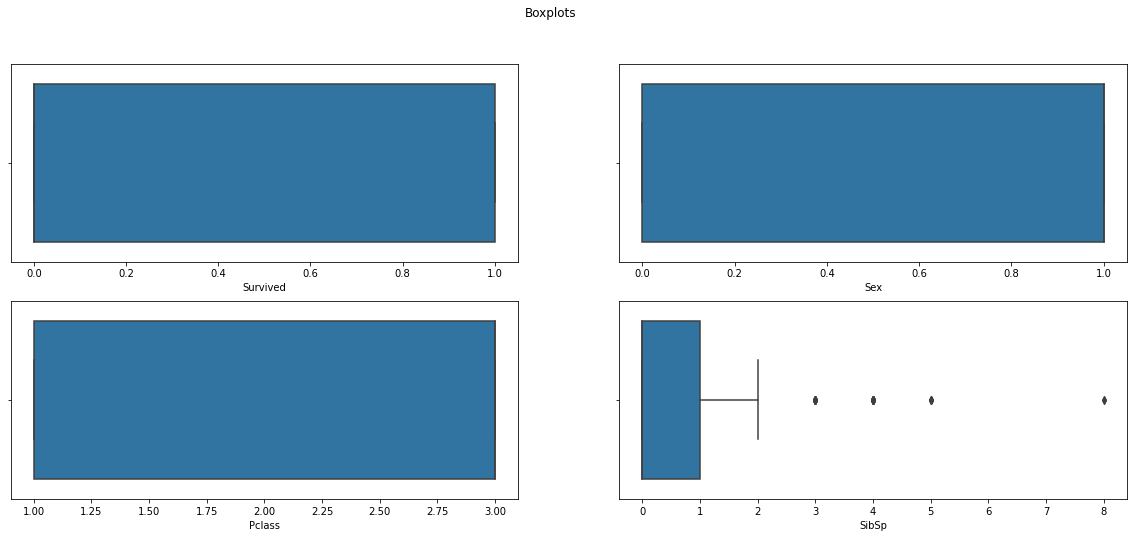

In [ ]:
# Checking for outliers
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 8))
fig.suptitle('Boxplots')
sb.boxplot(data['Survived'], ax=ax1)
sb.boxplot(data['Sex'], ax=ax2)
sb.boxplot(data['Pclass'], ax=ax3)
sb.boxplot(data['SibSp'], ax=ax4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

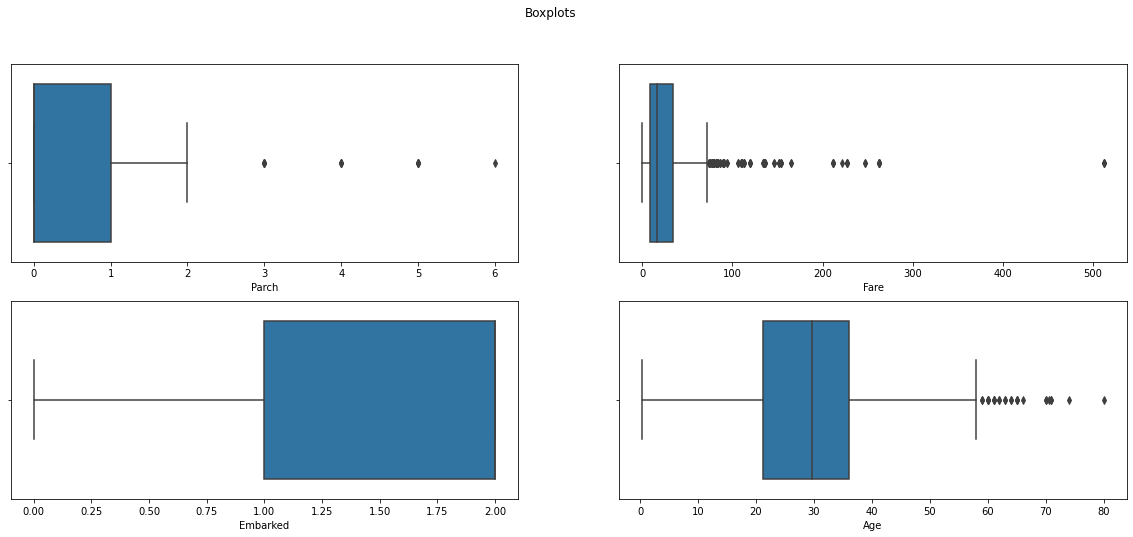

In [ ]:
# Checking for outliers
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 8))
fig.suptitle('Boxplots')
sb.boxplot(data['Parch'], ax=ax1)
sb.boxplot(data['Fare'], ax=ax2)
sb.boxplot(data['Embarked'], ax=ax3)
sb.boxplot(data['Age'], ax=ax4)

# 6. Exploratory Data Analysis

---



## Univariate Analysis

### Categorical variables

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# Percentage outliers

for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Columns %s outliers = %.2f%%" % (k, perc))


Columns Survived outliers = 0.00%
Columns Pclass outliers = 0.00%
Columns Sex outliers = 0.00%
Columns Age outliers = 3.34%
Columns SibSp outliers = 5.01%
Columns Parch outliers = 1.93%
Columns Fare outliers = 12.85%
Columns Embarked outliers = 0.00%


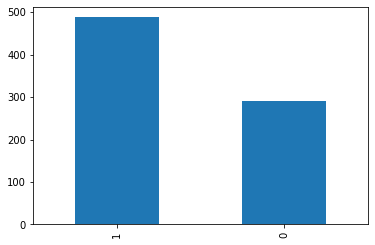

<Figure size 1008x648 with 0 Axes>

In [ ]:
data['Sex'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

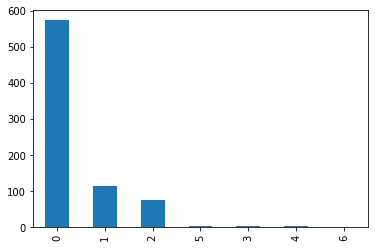

In [ ]:
data['Parch'].value_counts().plot(kind='bar')

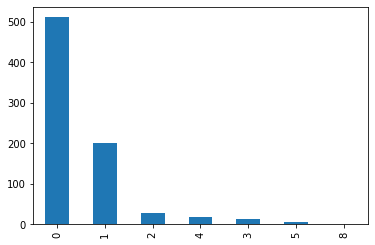

In [ ]:
data['SibSp'].value_counts().plot(kind='bar')

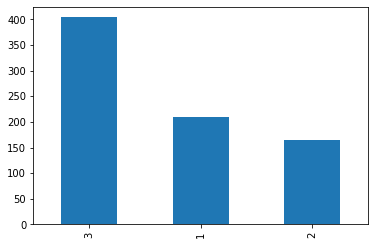

In [ ]:
data['Pclass'].value_counts().plot(kind='bar')

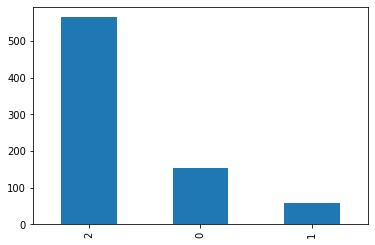

In [ ]:
data['Embarked'].value_counts().plot(kind='bar')

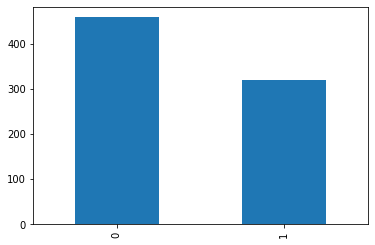

In [ ]:
data['Survived'].value_counts().plot(kind='bar')

### Numerical Variables

#### Measure of Central Tendency


In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#getting the measure of central tendency and Standard deviation together with variance of age
mean = data["Age"].mean()
median = data["Age"].median()
mode = data["Age"].mode()
std = data["Age"].std()
var = data["Age"].var()
max = data["Age"].max()
min = data["Age"].min()
range = max - min
quantile = data["Age"].quantile([0.25,0.5,0.75])
print('The mean of Age  is',mean)
print('The median of Age is',median)
print('The mode of Age is',mode)
print('The standard deviation of Age is',std)
print('The variance of Age is',var)
print('The Range of Age  is',range)
print('The quantile of Age is',quantile)

The mean of Age  is 29.745666112203203
The median of Age is 29.69911764705882
The mode of Age is 0    29.699118
dtype: float64
The standard deviation of Age is 13.67454970775624
The variance of Age is 186.9933097098963
The Range of Age  is 79.58
The quantile of Age is 0.25    21.250000
0.50    29.699118
0.75    36.000000
Name: Age, dtype: float64


In [ ]:
#getting the measure of central tendency and Standard deviation together with variance of TSH
mean = data["Fare"].mean()
median = data["Fare"].median()
mode = data["Fare"].mode()
std = data["Fare"].std()
var = data["Fare"].var()
max = data["Fare"].max()
min = data["Fare"].min()
range = max - min
quantile = data["Fare"].quantile([0.25,0.5,0.75])
print('The mean of Fare  is',mean)
print('The median of Fare is',median)
print('The mode of Fare is',mode)
print('The standard deviation Fare of is',std)
print('The variance of Fare is',var)
print('The Range of Fare is',range)
print('The quantile of Fare is',quantile)

The mean of Fare  is 34.71298701799485
The median of Fare is 15.9
The mode of Fare is 0    13.0
dtype: float64
The standard deviation Fare of is 52.28032556629783
The variance of Fare is 2733.2324413180945
The Range of Fare is 512.3292
The quantile of Fare is 0.25     8.0500
0.50    15.9000
0.75    33.8906
Name: Fare, dtype: float64


#### Kurtosis

In [ ]:
kurt1 = data['Age'].kurt()
print("The kurtosis for the Age  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = data['Fare'].kurt()
print("The kurtosis for the Fare is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 


The kurtosis for the Age  is:  0.5889607303622988
Leptokurtic


The kurtosis for the Fare is:  30.157424264662524
Leptokurtic




#### Skewness

In [ ]:

skew1 = data['Age'].skew()
print("The skewness for the Age is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = data['Fare'].skew()
print("The skewness for the Fare is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the Age is:  0.39572787881653304
The distribution is positively skewed


The skewness for the Fare is:  4.573366607470178
The distribution is positively skewed




In [ ]:
# Ploting the univariate summaries and recording our observations
#
# installing pandas profiling
! pip install -U pandas-profiling


     |████████████████████████████████| 256kB 5.2MB/s 
     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 645kB 16.3MB/s 
     |████████████████████████████████| 112kB 19.1MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 3.1MB 18.7MB/s 
     |████████████████████████████████| 10.1MB 43.1MB/s 
     |████████████████████████████████| 296kB 43.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=6a75142a00a8b29ba23a9ca56191a0c070406df407c7da808a3e28867245b78d
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=309e410515769afe685922e9006d2b92e33e8fa2413c5a173dc8e5a74bc85809
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db07554

In [ ]:
# Generating the profile report on the data dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(data)


In [ ]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Bivariate Analysis

In [ ]:
Correlation=data.corr()
Correlation

Survived    Pclass       Sex  ...     Parch      Fare  Embarked
Survived  1.000000 -0.333291 -0.511686  ...  0.071352  0.244700 -0.157858
Pclass   -0.333291  1.000000  0.113210  ...  0.037218 -0.551236  0.181243
Sex      -0.511686  0.113210  1.000000  ... -0.239210 -0.166952  0.101821
Age      -0.084185 -0.335180  0.099034  ... -0.185872  0.087692 -0.034728
SibSp    -0.036044  0.085055 -0.099980  ...  0.380174  0.135490  0.064530
Parch     0.071352  0.037218 -0.239210  ...  1.000000  0.192411  0.044173
Fare      0.244700 -0.551236 -0.166952  ...  0.192411  1.000000 -0.239262
Embarked -0.157858  0.181243  0.101821  ...  0.044173 -0.239262  1.000000

[8 rows x 8 columns]

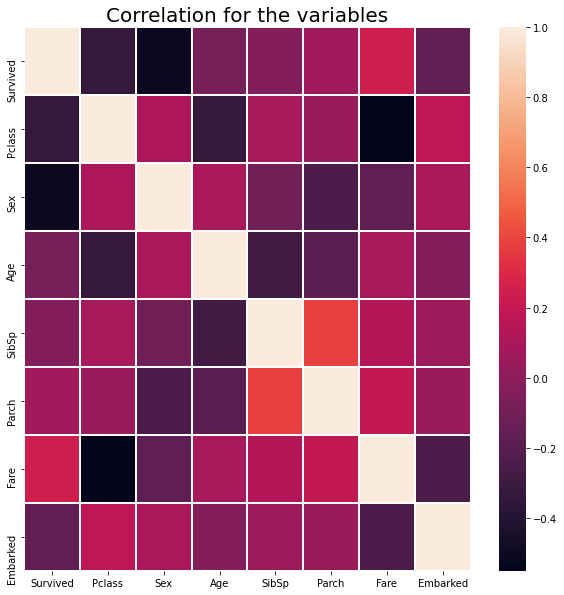

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(Correlation,xticklabels=Correlation.columns,yticklabels=Correlation.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the variables',fontsize=20)
plt.show()

There is high correlation among the last 12 Variables so we visualize their correlation matrix separately.

In [ ]:
#correlation matrix
correlations=data.iloc[: , -12:]
correlations

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
885         0       3    0  39.000000      0      5  29.1250         1
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[778 rows x 8 columns]

In [ ]:
correlations= correlations.corr()
correlations

Survived    Pclass       Sex  ...     Parch      Fare  Embarked
Survived  1.000000 -0.333291 -0.511686  ...  0.071352  0.244700 -0.157858
Pclass   -0.333291  1.000000  0.113210  ...  0.037218 -0.551236  0.181243
Sex      -0.511686  0.113210  1.000000  ... -0.239210 -0.166952  0.101821
Age      -0.084185 -0.335180  0.099034  ... -0.185872  0.087692 -0.034728
SibSp    -0.036044  0.085055 -0.099980  ...  0.380174  0.135490  0.064530
Parch     0.071352  0.037218 -0.239210  ...  1.000000  0.192411  0.044173
Fare      0.244700 -0.551236 -0.166952  ...  0.192411  1.000000 -0.239262
Embarked -0.157858  0.181243  0.101821  ...  0.044173 -0.239262  1.000000

[8 rows x 8 columns]

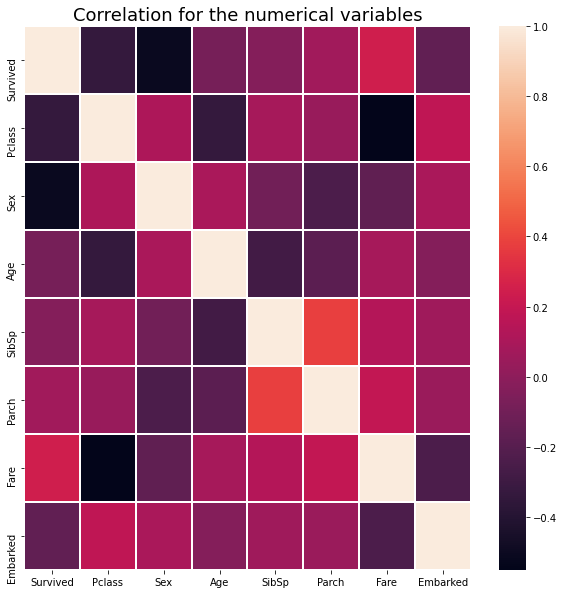

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

## Multivariate Analysis

In [ ]:
# Separating our target label (type) from the other features
feat = data.drop('Survived',axis=1)
status_label = data['Survived']
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, status_label)
lda_feat = lda.transform(feat)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)


0
Fare      0.000982
Age      -0.041844
Parch    -0.102355
Embarked -0.194782
SibSp    -0.308218
Pclass   -1.184578
Sex      -3.112974

## 7. Implementing the Solution

###Modeling  - K Nearest Neighbor (KNN)

In [ ]:
# Then loading our libraries
# 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the independent and dependent variables
X = data.drop(['Survived'],axis=1)
y = data['Survived']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
reg= KNeighborsClassifier()
params = reg.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred = clf.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[69 22]
 [35 30]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        91
           1       0.58      0.46      0.51        65

    accuracy                           0.63       156
   macro avg       0.62      0.61      0.61       156
weighted avg       0.63      0.63      0.63       156



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

Accuracy: 67.38 %
Standard Deviation of the cross validation: 4.40 %




In [ ]:
from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

In [ ]:
#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=reg, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 72.18 %
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan', metric_params=None, n_jobs=None, n_neighbors=8, p=2, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [ ]:
y_pred = clf.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[63 28]
 [26 39]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        91
           1       0.58      0.60      0.59        65

    accuracy                           0.65       156
   macro avg       0.64      0.65      0.65       156
weighted avg       0.66      0.65      0.65       156



# Challenging the Solution 


#Modelling

K NEAREST NEIGHBOUR CLASSIFIER





In [ ]:
# converting sex and embarked to categorical datatypes

data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [ ]:

# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [ ]:
#we need to split i.e independent and dependent variable

my_cols = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = data[my_cols].values
y = data['Survived']

In [ ]:
#we first partition our data 80-20, we get the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Engineering 

In [ ]:
# Feature Scaling
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#training our data and making predictions 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Lets make predictions on the dataset
y_pred = classifier.predict(X_test)

In [ ]:
# we assess the perfomance of our matrix using a confusing matrix, we can also check the classification report.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74 17]
 [32 33]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        91
           1       0.66      0.51      0.57        65

    accuracy                           0.69       156
   macro avg       0.68      0.66      0.66       156
weighted avg       0.68      0.69      0.68       156



In [ ]:
from sklearn import metrics
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6858974358974359



our model accuracy is 68.59%, our model is doing good.

### KNN Hyperparameter Tuning

70 - 30%

In [ ]:
#we now use 70% training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [ ]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93 34]
 [51 56]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       127
           1       0.62      0.52      0.57       107

    accuracy                           0.64       234
   macro avg       0.63      0.63      0.63       234
weighted avg       0.64      0.64      0.63       234



In [ ]:
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6367521367521367



our model accuracy dropped to 63.68%. Our model is doing good

60-40%

In [ ]:
#we now use 60% training data and 40% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [ ]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  34]
 [ 73  67]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       172
           1       0.66      0.48      0.56       140

    accuracy                           0.66       312
   macro avg       0.66      0.64      0.64       312
weighted avg       0.66      0.66      0.65       312



In [ ]:
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.657051282051282


##Follow - Up Questions



a) Did we have the right question? Yes

b) Was the data accurate? Yes.